In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def f(x,a,b,c):
    return a*x + b*x**2 + c

In [3]:
df = pd.read_csv('data.csv')
df['n'] = df['n']+1
df_stabilized = df.iloc[100:]

In [4]:
popt, pcov = curve_fit(f, df['n'].values, df['y'].values)

In [5]:
popt

array([-0.48800641,  0.88653067, 28.22730903])

In [6]:
df['y_pred'] = f(df['n'].values, *popt)
df['delta'] = df['y'] - df['y_pred']

In [7]:
df

,n,y,y_pred,delta
0,1,1,28.625833,-27.625833
1,2,4,30.797419,-26.797419
2,3,8,34.742066,-26.742066
3,4,15,40.459774,-25.459774
4,5,22,47.950544,-25.950544
...,...,...,...,...
495,496,217919,217886.905560,32.094440
496,497,218832,218766.742509,65.257491
497,498,219735,219648.352520,86.647480
498,499,220627,220531.735592,95.264408


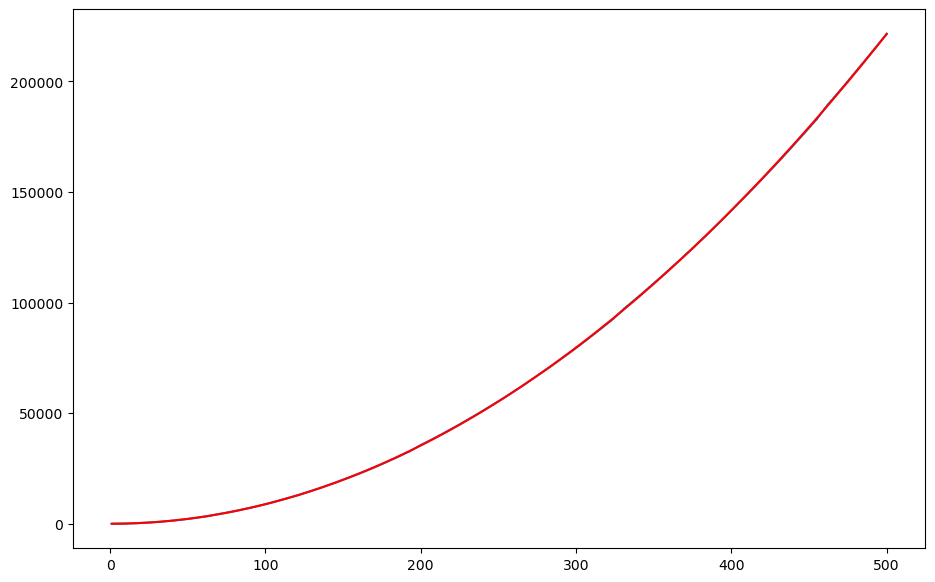

In [8]:
fig, ax = plt.subplots(figsize = (11,7))
ax.plot(df['n'], df['y'])
ax.plot(df['n'], df['y_pred'], color = 'red')

plt.show()

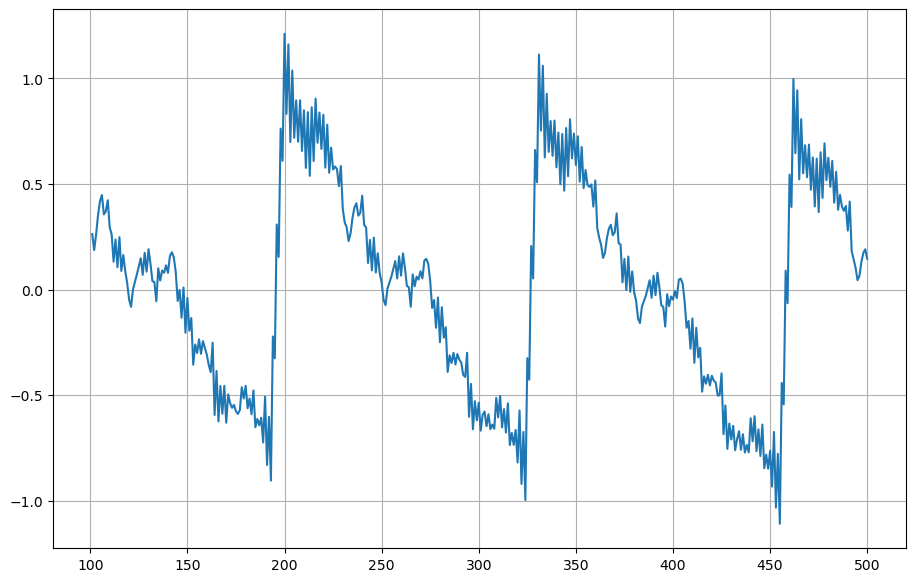

In [9]:
fig, ax = plt.subplots(figsize = (11,7))
ax.plot(df.iloc[100:]['n'], df.iloc[100:]['delta'] / df.iloc[100:]['n'] )
# ax.set_ylim(-0.7,0.7)
ax.grid()
plt.show()